## ABOUT THE PROJECT

There are two types of data visualization:
   * Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
   * Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout the Project, we focused on explanatory data visualization and learned the following:
   * How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for       an audience.
   * About the elements of a story and how to create storytelling data visualizations using Matplotlib.
   * How to guide the audience's attention with pre-attentive attributes.
   * How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Reading a CSV File

In [2]:
df = pd.read_csv("euro-daily-hist_1999_2022.csv")

In [3]:
df.head(10)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441
5,2023-12-08,1.6327,1.9558,5.2933,1.4627,0.9438,7.7179,NaN,24.354,7.4558,...,4.9683,NaN,11.238,1.4426,NaN,NaN,38.097,31.2340,1.0777,20.3657
6,2023-12-07,1.6407,1.9558,5.2614,1.4656,0.9446,7.7058,NaN,24.356,7.4551,...,4.9658,NaN,11.2557,1.4436,NaN,NaN,37.925,31.1627,1.0771,20.2056
7,2023-12-06,1.6391,1.9558,5.2994,1.4616,0.9429,7.7148,NaN,24.335,7.4557,...,4.9687,NaN,11.3065,1.4452,NaN,NaN,37.895,31.1921,1.0778,20.4401
8,2023-12-05,1.6492,1.9558,5.3636,1.47,0.9456,7.7269,NaN,24.369,7.4559,...,4.9671,NaN,11.3095,1.4487,NaN,NaN,38.133,31.2925,1.0817,20.4715
9,2023-12-04,1.6351,1.9558,5.3175,1.4716,0.9476,7.758,NaN,24.394,7.4564,...,4.9677,NaN,11.321,1.4515,NaN,NaN,38.035,31.3983,1.0868,20.3627


## Understanding the Data

In [4]:
df.shape

(6456, 41)

The data contains 6456 rows and 41 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

There are missing values in some columns but our main columns are "period/unit" and "US dollar" and there are no missing values in them. 

In [6]:
df.duplicated().sum()

0

In [7]:
df.rename(columns={"[US dollar ]" : "US_Dollar" , "Period\\Unit:" : "Time"}, inplace=True)

In [8]:
euro_to_dollar = pd.DataFrame(df[['Time' , "US_Dollar"]]).copy()

In [9]:
euro_to_dollar["US_Dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.0867     7
1.1268     7
          ..
1.4304     1
1.4273     1
1.4528     1
1.4481     1
1.1659     1
Name: US_Dollar, Length: 3769, dtype: int64

There are 62 "-" values the reason maybe because of weekend or the data was not taken on that specific day so we will drop those values

In [10]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_Dollar"] != '-'] 

In [11]:
euro_to_dollar["Time"] = pd.to_datetime(euro_to_dollar["Time"])

In [12]:
euro_to_dollar["US_Dollar"] = euro_to_dollar["US_Dollar"].astype(float)

In [13]:
euro_to_dollar.sort_values('Time' , inplace=True)

In [14]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_Dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


## `Rolling Mean`

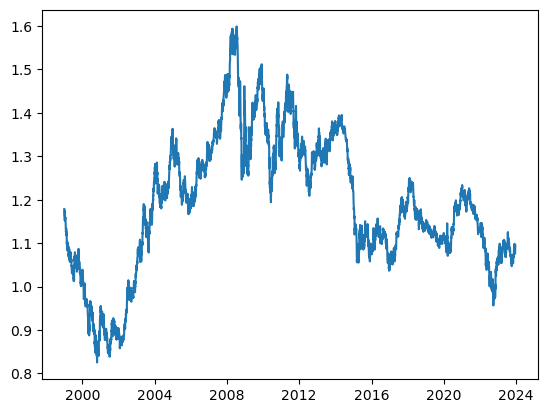

In [15]:
plt.plot(euro_to_dollar['Time'] , euro_to_dollar["US_Dollar"])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

In [16]:
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))
values

,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [17]:
values['rolling_mean2'] = values['daily_values'].rolling(2).mean()
values

,daily_values,rolling_mean2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0


In [18]:
values['rolling_mean5'] = values['daily_values'].rolling(3).mean()
values


,daily_values,rolling_mean2,rolling_mean5
0,1,NaN,NaN
1,3,2.0,NaN
2,5,4.0,3.0
3,7,6.0,5.0
4,9,8.0,7.0
5,11,10.0,9.0
6,13,12.0,11.0
7,15,14.0,13.0
8,17,16.0,15.0
9,19,18.0,17.0


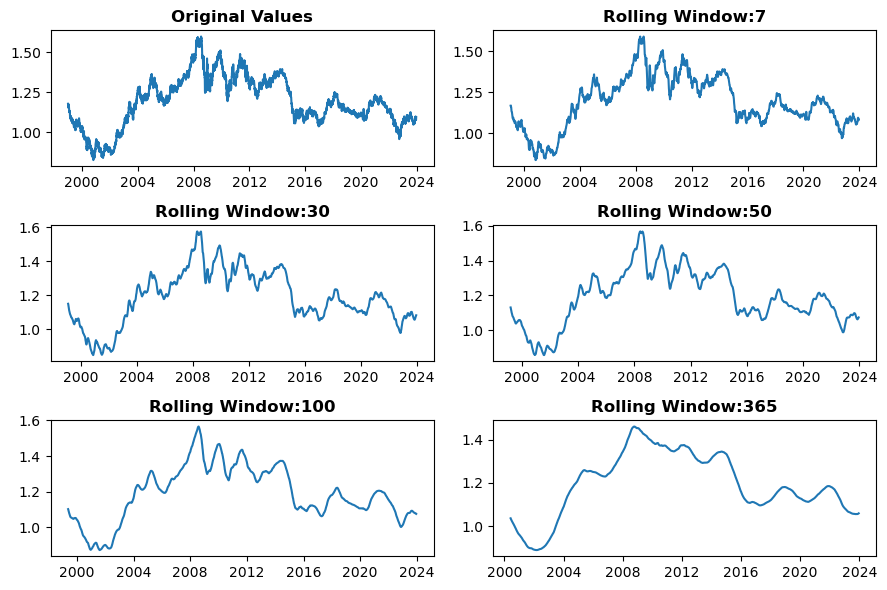

In [19]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar["Time"] , euro_to_dollar["US_Dollar"])
plt.title("Original Values" , weight = 'bold')

for i , rolling_mean in zip([2,3,4,5,6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar["Time"] , euro_to_dollar["US_Dollar"].rolling(rolling_mean).mean())
    #plt.ylim(0.5,1.6)
    plt.title("Rolling Window:" + str(rolling_mean) , weight = 'bold')

plt.tight_layout()
plt.show()
    

In [20]:
euro_to_dollar["rolling_mean30"] = euro_to_dollar['US_Dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_Dollar,rolling_mean30
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


In [21]:
financial_crisis = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis7_8 = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2008)]
financial_crisis7_8.sample(10)

,Time,US_Dollar,rolling_mean30
4286,2007-04-27,1.3643,1.343177
4356,2007-01-19,1.2958,1.311407
4366,2007-01-05,1.3084,1.317563
4248,2007-06-20,1.3427,1.344667
3988,2008-06-18,1.5493,1.554690
4304,2007-04-03,1.3358,1.323437
3924,2008-09-16,1.4267,1.463463
4087,2008-01-31,1.4870,1.465503
3857,2008-12-18,1.4616,1.292070
4005,2008-05-26,1.5761,1.564573


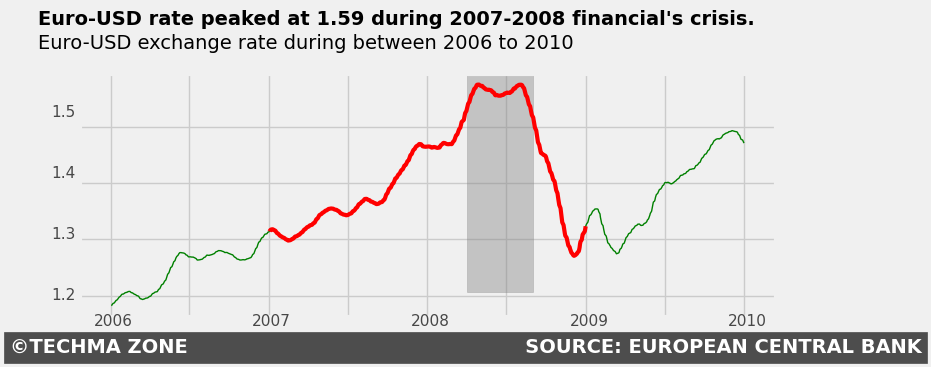

In [22]:
import matplotlib.style as style
style.use("fivethirtyeight")

# Adding the plot
fig , ax = plt.subplots(figsize = (8,3))

ax.plot(financial_crisis["Time"] , financial_crisis['rolling_mean30'] , linewidth = 1 , color = "green")

# Hightlighting the 2007-2008 period
ax.plot(financial_crisis7_8["Time"] , financial_crisis7_8['rolling_mean30'] , linewidth = 3 , color = "red")


ax.set_xticklabels([])

x = 0.02
for year in ['2006' , '2007' , '2008' , '2009', '2010']:
    ax.text(x , -0.04 , year , transform = plt.gca().transAxes , alpha=0.7 , fontsize=11)
    x +=0.228

ax.set_yticklabels([])

y = 0.07
for rate in ['1.2', '1.3', '1.4', '1.5',]:
    ax.text(-0.04 , y , rate , transform = plt.gca().transAxes , alpha=0.7 , fontsize=11)
    y +=0.25
    
# Adding a title and subtitle
ax.text(-0.06, 1.2 , "Euro-USD rate peaked at 1.59 during 2007-2008 financial's crisis." , transform = plt.gca().transAxes , weight = 'bold')
ax.text(-0.06, 1.1 , "Euro-USD exchange rate during between 2006 to 2010" , transform = plt.gca().transAxes)

# Adding a signature
ax.text(-0.1, -0.15 , "©TECHMA ZONE" + ' '*50 + "SOURCE: EUROPEAN CENTRAL BANK" , transform = plt.gca().transAxes , weight = 'bold' , color='white' , backgroundcolor='#4d4d4d')


ax.axvspan(xmin=pd.to_datetime("2008-04-1") , xmax=pd.to_datetime("2008-09-1") , ymin=0.1, alpha = 0.4 , color='gray')






plt.show()



## `Coming Up With an Idea`

Here are a few story ideas for our data:
* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and 2016-2019 data as baseline. We can use a line plot.
* We show how the euro-dollar rate has changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents G.W Bush (2001-2009), B.Obama (2009-2017), and D.Trump (2017-2021). We can use a line plot.

# COVID 19

In [23]:
before_covid = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2016) & (euro_to_dollar['Time'].dt.year <= 2019)]
covid_period = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2020) & (euro_to_dollar['Time'].dt.year < 2021)]
covid_period.sample(10)

,Time,US_Dollar,rolling_mean30
771,2020-12-17,1.2246,1.197800
901,2020-06-18,1.1222,1.107823
791,2020-11-19,1.1832,1.179163
839,2020-09-14,1.1876,1.183760
779,2020-12-07,1.2128,1.186763
823,2020-10-06,1.1795,1.179760
833,2020-09-22,1.1740,1.184070
804,2020-11-02,1.1652,1.174990
811,2020-10-22,1.1821,1.177057
789,2020-11-23,1.1901,1.179730


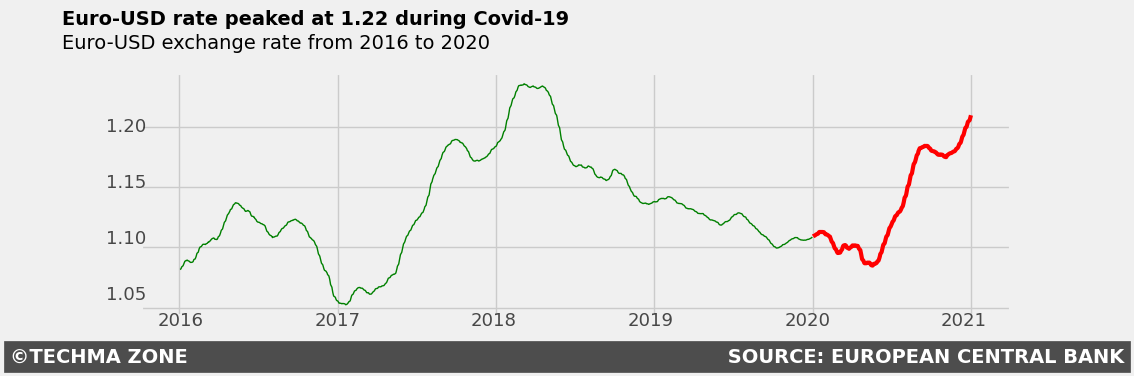

In [24]:
import matplotlib.style as style
style.use("fivethirtyeight")

# Adding the plot
fig , ax = plt.subplots(figsize = (10,3))

ax.plot(before_covid["Time"] , before_covid['rolling_mean30'] , linewidth = 1 , color = "green")

# Hightlighting the 2007-2008 period
ax.plot(covid_period["Time"] , covid_period['rolling_mean30'] , linewidth = 3 , color = "red")


ax.set_xticklabels([])

x = 0.02
for year in ['2016' , '2017' , '2018' , '2019', '2020' , '2021']:
    ax.text(x , -0.04 , year , transform = plt.gca().transAxes , alpha=0.7 , fontsize=13)
    x +=0.18

ax.set_yticklabels([])

y = 0.07
for rate in ['1.05', '1.10', '1.15', '1.20',]:
    ax.text(-0.04 , y , rate , transform = plt.gca().transAxes , alpha=0.7 , fontsize=13)
    y +=0.23
    
# Adding a title and subtitle
ax.text(-0.09, 1.2 , "Euro-USD rate peaked at 1.22 during Covid-19" , transform = plt.gca().transAxes , weight = 'bold')
ax.text(-0.09, 1.1 , "Euro-USD exchange rate from 2016 to 2020" , transform = plt.gca().transAxes)

# Adding a signature
ax.text(-0.15, -0.19 , "©TECHMA ZONE" + ' '*80 + "SOURCE: EUROPEAN CENTRAL BANK" , transform = plt.gca().transAxes , weight = 'bold' , color='white' , backgroundcolor='#4d4d4d')



plt.show()

## `The Three US President Example`

In [25]:
bush_obama_trump = euro_to_dollar[(euro_to_dollar['Time'].dt.year >=2001) & (euro_to_dollar['Time'].dt.year <=2021)]
bush = bush_obama_trump[(bush_obama_trump['Time'].dt.year >=2001) & (bush_obama_trump['Time'].dt.year <2009)]
obama = bush_obama_trump[(bush_obama_trump['Time'].dt.year >=2009) & (bush_obama_trump['Time'].dt.year <2017)]
trump = bush_obama_trump[(bush_obama_trump['Time'].dt.year >=2017) & (bush_obama_trump['Time'].dt.year <2021)]

Below, you will notice we used matplotlib's functional approach to build the graphs. We can use this appraoch because it offers more flexibility in arranging the subplots:

* We first build three of the graps on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
* We then build only the bottom graph on a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
* The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

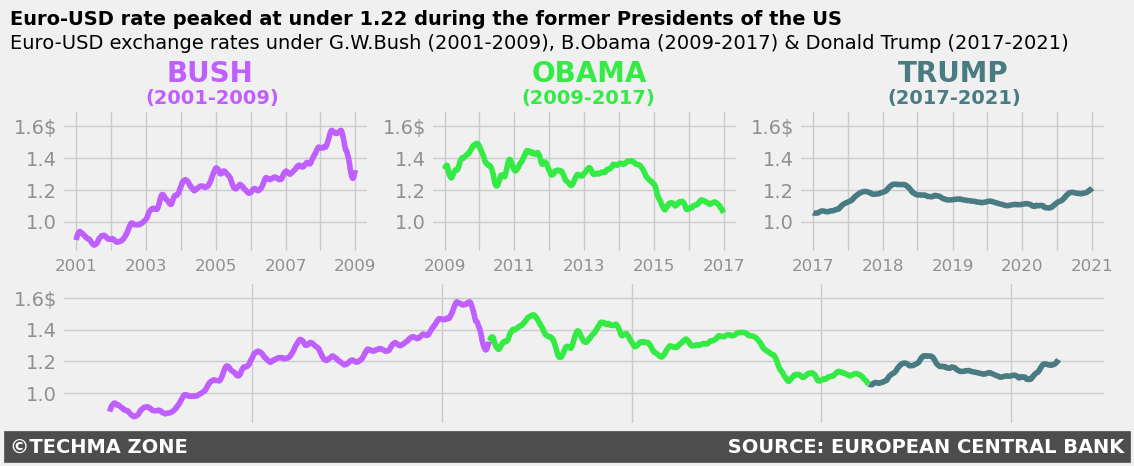

In [26]:
# Adding the FiveThirtyEight style
style.use("fivethirtyeight")

# Adding the subplots
plt.figure(figsize=(12,6))

# Pattern 1
ax1 = plt.subplot(3,3,1) # row,col,index
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

# Pattern 2
ax4 = plt.subplot(3,1,2)

axes = [ax1, ax2, ax3, ax4]

# Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6$'] , alpha=0.4)
    
# Ax1 : Bush
ax1.plot(bush['Time'] , bush['rolling_mean30'], color='#BF5FFF')
ax1.set_xticklabels([' ', '2001', ' ', '2003', ' ', '2005', ' ', '2007', ' ', '2009'] , alpha=0.4 , size=12)
ax1.text(0.1, 2.4, 'BUSH', fontsize=20, weight='bold', color='#BF5FFF' , transform=plt.gca().transAxes)
ax1.text(0.08, 2.25, '(2001-2009)', weight='bold', color='#BF5FFF' , transform=plt.gca().transAxes)

# Ax2 : Obama
ax2.plot(obama['Time'] , obama['rolling_mean30'], color='#34eb46')
ax2.set_xticklabels([ ' ', '2009' , ' ', '2011', ' ', '2013', ' ', '2015', ' ','2017'] , alpha=0.4 , size=12)
ax2.text(0.45, 2.4, 'OBAMA', fontsize=20, weight='bold', color='#34eb46' , transform=plt.gca().transAxes)
ax2.text(0.44, 2.25, '(2009-2017)', weight='bold', color='#34eb46' , transform=plt.gca().transAxes)

# Ax3 : TRUMP
ax3.plot(trump['Time'] , trump['rolling_mean30'], color='#497b82')
ax3.set_xticklabels(['2017', ' ', '2018', ' ',  '2019', ' ',  '2020', ' ',  '2021'] , alpha=0.4 , size=12)
ax3.text(0.8, 2.4, 'TRUMP', fontsize=20, weight='bold', color='#497b82' , transform=plt.gca().transAxes)
ax3.text(0.79, 2.25, '(2017-2021)', weight='bold', color='#497b82' , transform=plt.gca().transAxes)

    
# All three presidents
ax4.plot(bush['Time'] , bush['rolling_mean30'], color='#BF5FFF')
ax4.plot(obama['Time'] , obama['rolling_mean30'], color='#34eb46')
ax4.plot(trump['Time'] , trump['rolling_mean30'], color='#497b82')

ax4.set_xticklabels([])


# Adding a title and subtitle
ax.text(-0.05, 2.8 , "Euro-USD rate peaked at under 1.22 during the former Presidents of the US" , transform = plt.gca().transAxes , weight = 'bold')
ax.text(-0.05, 2.63 , "Euro-USD exchange rates under G.W.Bush (2001-2009), B.Obama (2009-2017) & Donald Trump (2017-2021)" , transform = plt.gca().transAxes)


# Adding a signature
ax.text(-0.05, -0.19 , "©TECHMA ZONE" + ' '*80 + "SOURCE: EUROPEAN CENTRAL BANK" , transform = plt.gca().transAxes , weight = 'bold' , color='white' , backgroundcolor='#4d4d4d')
  

plt.show()

# `SUMMARY`

Summary of the Project:

In this project, the focus was on explanatory data visualization, particularly using Matplotlib, to convey meaningful insights to an audience. The key components of the project include importing necessary libraries, reading a CSV file, cleaning and transforming data, and creating various data visualizations.

The project began with exploratory data analysis on Euro to Dollar exchange rates, emphasizing the importance of information design principles and storytelling techniques. Techniques such as rolling mean were employed to smooth out daily fluctuations, enabling a clearer representation of long-term trends.

A case study on the FiveThirtyEight style was conducted, showcasing its application in visualizing the Euro to Dollar exchange rates during the 2007-2008 financial crisis. The use of pre-attentive attributes and attention-guiding strategies was highlighted to enhance the audience's understanding.

Subsequently, the project generated three compelling story ideas for data visualization, which were implemented using line plots:
1. Analyzing the Euro-Dollar rate changes during the COVID-19 pandemic (2020) compared to the baseline of 2016-2019.
2. Examining the Euro-Dollar rate during the 2007-2008 financial crisis, with additional data from 2006 and 2009 for comparison.
3. Comparative analysis of Euro-Dollar rate changes under the last three U.S. presidents: George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021).

Each data visualization was carefully crafted with attention to detail, using the FiveThirtyEight style for consistency and clarity. The visualizations effectively communicated the desired narratives, providing insights into historical events and trends in the Euro to Dollar exchange rates.

The project concludes with a summary of the three story ideas and their visualizations, showcasing the versatility of Matplotlib for creating impactful explanatory data visualizations. The visualizations are not only informative but also adhere to information design principles, making them accessible and engaging for a diverse audience.